## PS1-2 Incomplete, Positive-Only Labels

#### (a)

Suppose that each $y^{(i)}$ and $x^{(i)}$ are conditionally independent given $t^{(i)}$, that is

$$p(y^{(i)} = 1 \ \vert \ t^{(i)} = 1, x^{(i)}) = p(y^{(i)} = 1 \ \vert \ t^{(i)} = 1)$$

Then

\begin{align*}
p(y^{(i)} \ \vert \ x^{(i)}) & = \sum_{t^{(i)}} p(y^{(i)} = 1, t^{(i)} \ \vert \ x^{(i)}) \\
                             & = p(y^{(i)} = 1, t^{(i)} = 1 \ \vert \ x^{(i)}) + p(y^{(i)} = 1, t^{(i)} = 0 \ \vert \ x^{(i)}) \\
                             & = p(y^{(i)} = 1, t^{(i)} = 1 \ \vert \ x^{(i)}) + 0 \\
                             & = p(y^{(i)} = 1 \ \vert \ t^{(i)} = 1, x^{(i)}) \ p(t^{(i)} = 1 \ \vert \ x^{(i)}) \\
                             & = p(y^{(i)} = 1 \ \vert \ t^{(i)} = 1) \ p(t^{(i)} = 1 \ \vert \ x^{(i)}) \\
                             & = \alpha \ p(t^{(i)} = 1 \ \vert \ x^{(i)})
\end{align*}

Therefore, $p(t^{(i)} = 1 \ \vert \ x^{(i)}) = p(y^{(i)} \ \vert \ x^{(i)}) / \alpha$, where $\alpha = p(y^{(i)} = 1 \ \vert \ t^{(i)} = 1)$.

#### (b)

\begin{align*}
h(x^{(i)}) & \approx p(y^{(i)} = 1 \ \vert \ x^{(i)}) \\
           & = \alpha \ p(t^{(i)} = 1 \ \vert \ x^{(i)}) \\
           & \approx \alpha \cdot 1 \\
           & = \alpha
\end{align*}

#### (c)

In [1]:
import numpy as np
import problem_set_1.src.util as util

from problem_set_1.src.linear_model import LinearModel

In [2]:
x_train, y_train = util.load_dataset('data/ds3_train.csv', add_intercept=True)
_, t_train = util.load_dataset('data/ds3_train.csv', label_col='t')
x_valid, y_valid = util.load_dataset('data/ds3_valid.csv', add_intercept=True)
_, t_valid = util.load_dataset('data/ds3_valid.csv', label_col='t')
x_test, y_test = util.load_dataset('data/ds3_test.csv', add_intercept=True)
_, t_test = util.load_dataset('data/ds3_test.csv', label_col='t')

Reuse the logistic regression model in PS1-1:

In [3]:
class LogisticRegression(LinearModel):
    """Logistic regression with Newton's Method as the solver.

    Example usage:
        > clf = LogisticRegression()
        > clf.fit(x_train, y_train)
        > clf.predict(x_eval)
    """

    def fit(self, x, y):
        """Run Newton's Method to minimize J(theta) for logistic regression.

        :param x: Training example inputs. Shape (m, n).
        :param y: Training example labels. Shape (m,).
        """

        def h(theta, x):
            """Vectorized implementation of h_theta(x) = 1 / (1 + exp(-theta^T x)).

            :param theta: Shape (n,).
            :param x:     All training examples of shape (m, n).
            :return:      The hypothesis for all training examples. Shape (m,).
            """
            return 1 / (1 + np.exp(-np.dot(x, theta)))

        def gradient(theta, x, y):
            """Vectorized implementation of the gradient of J(theta).

            :param theta: Shape (n,).
            :param x:     All training examples of shape (m, n).
            :param y:     All labels of shape (m,).
            :return:      The gradient of shape (n,).
            """
            m, _ = x.shape
            return -1 / m * np.dot(x.T, (y - h(theta, x)))

        def hessian(theta, x):
            """Vectorized implementation of the Hessian of J(theta).

            :param theta: Shape (n,).
            :param x:     All training examples of shape (m, n).
            :return:      The Hessian of shape (n, n).
            """
            m, _ = x.shape
            h_theta_x = np.reshape(h(theta, x), (-1, 1))
            return 1 / m * np.dot(x.T, h_theta_x * (1 - h_theta_x) * x)

        def next_theta(theta, x, y):
            """The next theta updated by Newton's Method.

            :param theta: Shape (n,).
            :return:      The updated theta of shape (n,).
            """
            return theta - np.dot(np.linalg.inv(hessian(theta, x)), gradient(theta, x, y))

        m, n = x.shape

        # Initialize theta
        if self.theta is None:
            self.theta = np.zeros(n)

        # Update theta using Newton's Method
        old_theta = self.theta
        new_theta = next_theta(self.theta, x, y)
        while np.linalg.norm(new_theta - old_theta, 1) >= self.eps:
            old_theta = new_theta
            new_theta = next_theta(old_theta, x, y)

        self.theta = new_theta

    def predict(self, x):
        """Make a prediction given new inputs x.

        :param x: Inputs of shape (m, n).
        :return:  Outputs of shape (m,).
        """

        return x @ self.theta >= 0

Use true t-labels for training:

In [4]:
log_reg = LogisticRegression()
log_reg.fit(x_train, t_train)

Plot decision boundary for training set:

Theta is:  [-0.9711418   2.73208784  1.07403478]
The accuracy on training set is:  0.9632


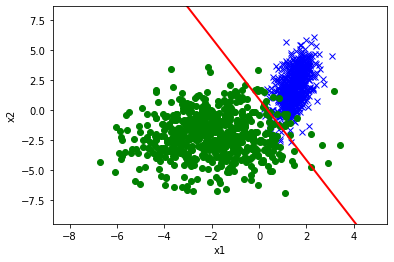

In [5]:
util.plot(x_train, t_train, log_reg.theta)
print("Theta is: ", log_reg.theta)
print("The accuracy on training set is: ", np.mean(t_train == log_reg.predict(x_train)))

Plot decision boundary for test set:

Theta is:  [-0.9711418   2.73208784  1.07403478]
The accuracy on test set is:  0.9838709677419355


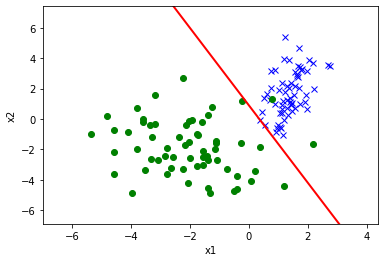

In [6]:
util.plot(x_test, t_test, log_reg.theta)
print("Theta is: ", log_reg.theta)
print("The accuracy on test set is: ", np.mean(t_test == log_reg.predict(x_test)))

#### (d)

Assume the t-labels are unavailable, we then switch to y-labels for training:

In [7]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

Plot the new decision boundary for test set. We expect it to perform poorly.

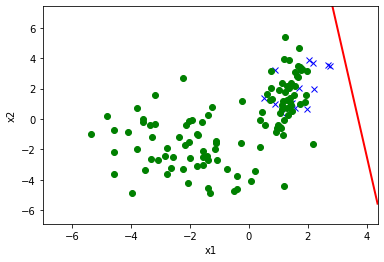

In [8]:
util.plot(x_test, y_test, log_reg.theta)

#### (e)

According to part (b), we know that:

$$p(t^{(i)} = 1 \ \vert \ x^{(i)}) = \frac{1}{\alpha} \ p(y^{(i)} = 1 \ \vert \ x^{(i)})$$,

meaning if we can find $\alpha$, we can estimate $p(t^{(i)} = 1 \ \vert \ x^{(i)})$ with y-labeled data.

It's easy to prove that $h(x^{(i)}) = \alpha$ when $y^{(i)} = 1$, and $h(x^{(i)}) = 0$ when $y^{(i)} = 0$.
Hence:

$$\alpha = \mathbb E [h(x^{(i)}) \ \vert \ y^{(i)} = 1] \approx \frac{1}{\vert V_+ \vert} \sum_{x^{(i)} \in V_+} h(x^{(i)})$$

Reuse function `h` in the logistic regression model:

In [9]:
def h(theta, x):
    return 1 / (1 + np.exp(-np.dot(x, theta)))

Estimate $\alpha$:

In [10]:
v_plus = x_valid[y_valid == 1]
alpha = h(log_reg.theta, v_plus).mean()

Rescale the classifier's predictions using $\alpha$:

In [11]:
def predict(theta, x):
    return h(theta, x) / alpha >= 0.5

To plot the decision boundary found by solving $\frac{1}{\alpha} \frac{1}{1 + \exp(- \theta^T x)} = \frac{1}{2}$,
we can equivalently transform the equation to the form of $\theta'^T x = 0$ and solve for $\theta'$. By simplifying
the equation, we obtain $\theta^T x + \log (\frac{2}{\alpha} - 1) = 0$. The left-hand side is in fact adding $\log (\frac{2}{\alpha} - 1)$
to $\theta_0$. Hence, $\theta' = \theta + \log (\frac{2}{\alpha} - 1)[1, 0, 0]^T$.

In [12]:
theta_prime = log_reg.theta + np.log(2 / alpha - 1) * np.array([1, 0, 0])

Plot decision boundary for test set:

Theta_prime is:  [-0.55096984  0.78596651  0.09282768]
The accuracy on test set is:  0.9516129032258065


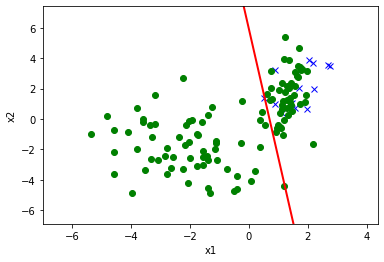

In [13]:
util.plot(x_test, y_test, theta_prime)
print("Theta_prime is: ", theta_prime)
print("The accuracy on test set is: ", np.mean(predict(log_reg.theta, x_test) == t_test))